In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv(r'c:\pyml_scripts\chapter02_regression\poly_r.csv',names=['Long','Width'])
df

,Long,Width
0,222.43,66.27
1,266.05,57.04
2,294.59,54.91
3,327.15,55.58
4,369.16,61.22
5,423.98,69.73
6,497.35,81.34
7,590.17,92.90
8,721.94,123.73
9,800.00,135.00


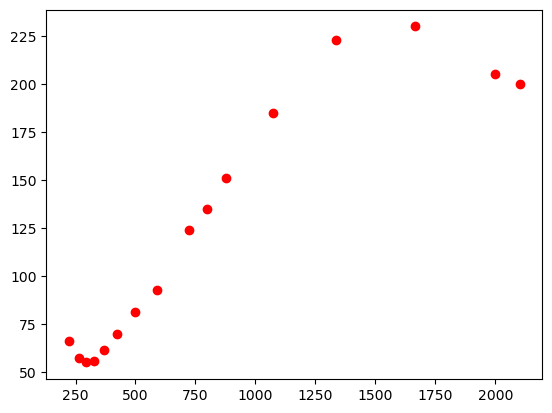

In [3]:
#X = df[['Long']].as_matrix()  #請改用df[['Long']].values來取代過去的as_matrix(),不然將出現錯誤訊息
X = df[['Long']].values
y = df[['Width']].values
plt.scatter(X,y,c='red')
plt.show()

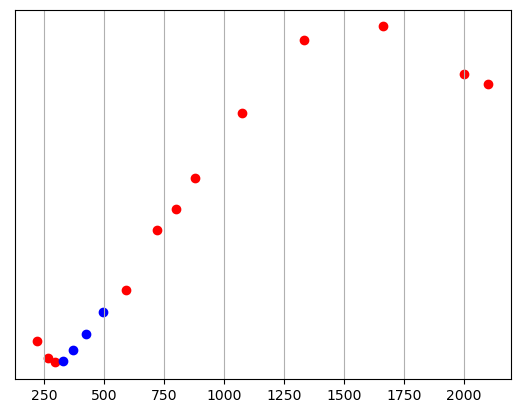

In [4]:
#將資料集分為訓練資料與測試資料(80/20)
#random_state若相同，可以確保每次執行時，訓練/測試資料都是相同分割結果
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#使用訓練資料/測試資料繪製散點圖
plt.figure()
plt.yticks(np.linspace(0,40,10))
plt.scatter(X_train,y_train,c='red')    #訓練資料
plt.scatter(X_test,y_test,c='blue')     #測試資料
plt.grid(True)
plt.show()

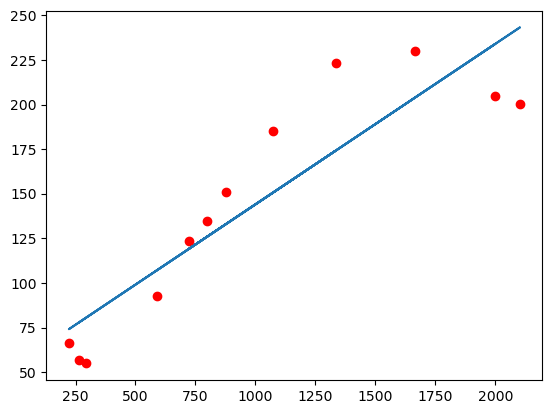

In [5]:
#先試著使用linear model
Width_reg = linear_model.LinearRegression()
Width_reg.fit(X_train,y_train)
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,Width_reg.predict(X_train))
plt.show()

In [6]:
#model.score(原始X,原始y),但計算R2時,將使用model.predict(原始X)得到預測y,接著計算預測y與原始y的差異
Width_reg.score(X_train,y_train) #OLS沒有正則化

0.8133925181444416

In [7]:
print("係數:",Width_reg.coef_)
print("截距:",Width_reg.intercept_)

係數: [[0.08995075]]
截距: [54.12470682]


In [8]:
#測試誤差(若測試誤差遠大於訓練誤差,表示出現過度擬合情況)
Width_reg.score(X_test,y_test)

-5.046341786362292

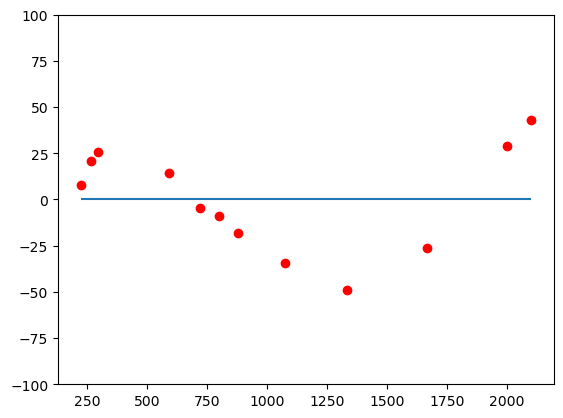

In [9]:
y_pred=Width_reg.predict(X_train)
plt.scatter(X_train,y_pred-y_train,c='red')
plt.hlines(0,np.min(X_train),np.max(X_train))
plt.ylim(-100,100)
plt.show()

In [10]:
#Ridge/Lasso皆自動加上隨機誤差,所以不會提升訓練效果,但可能提升泛化能力.
Width_ridge = Ridge(alpha=1.0)              #使用Ridge regression自動進行L2正則化,多元(複)迴歸時,所有自變數的係數將變得較小
Width_ridge.fit(X_train,y_train)            #係數變小,讓對應特徵影響最終結果的程度減少
Width_ridge.score(X_train,y_train)          #因為目前範例只有一個特徵
                                            #alpha設定regularation強度,越大越強

0.813392518144405

In [11]:
print("係數:",Width_ridge.coef_)
print("截距:",Width_ridge.intercept_)

係數: [[0.08995073]]
截距: [54.12472582]


In [12]:
Width_ridge.score(X_test,y_test) 

-5.046347524438134

In [13]:
Width_lasso = linear_model.Lasso(alpha=1.0)  #使用Lasso regression自動進行L1正則化,多元(複)迴歸時,有些自變數的係數將變成0
Width_lasso.fit(X_train,y_train)             #用來減少特徵數(特徵選擇)以避免overfit(過度擬和)
Width_lasso.score(X_train,y_train)            #Lasso(alpha=0)等同於OLS

0.8133925174931586

In [14]:
print("係數:",Width_lasso.coef_)
print("截距:",Width_lasso.intercept_)

係數: [0.0899482]
截距: [54.12724126]


In [15]:
Width_lasso.score(X_test,y_test)

-5.047107306340269

pipeline管線化
model = make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
自變數的指數為3,使用OLS
PolynomialFeatures(n)自動將X變成指數項為3的資料集

In [16]:
Xs=np.sort(X_train,axis=0)
Xs

array([[ 222.43],
       [ 266.05],
       [ 294.59],
       [ 590.17],
       [ 721.94],
       [ 800.  ],
       [ 878.41],
       [1073.76],
       [1334.61],
       [1664.84],
       [2000.  ],
       [2102.  ]])

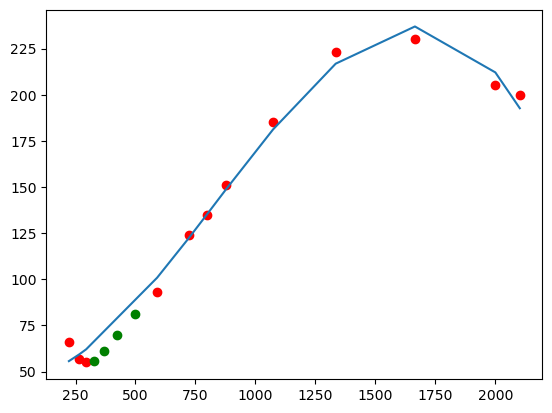

訓練誤差 0.9904391254499285
測試誤差 0.30998387531978155


In [17]:
#針對特徵X,將其變成a1X1+a2X2+a3X3+....+anXn
#make_pipeline(step1,step2) -> data->step1->step2
model3 = make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model3.fit(X_train,y_train)
plt.scatter(X_train,y_train,c='red')
plt.scatter(X_test,y_test,c='green')
plt.plot(np.sort(X_train,axis=0),model3.predict(np.sort(X_train,axis=0)))
plt.show()
print("訓練誤差",model3.score(X_train,y_train))
print("測試誤差",model3.score(X_test,y_test))

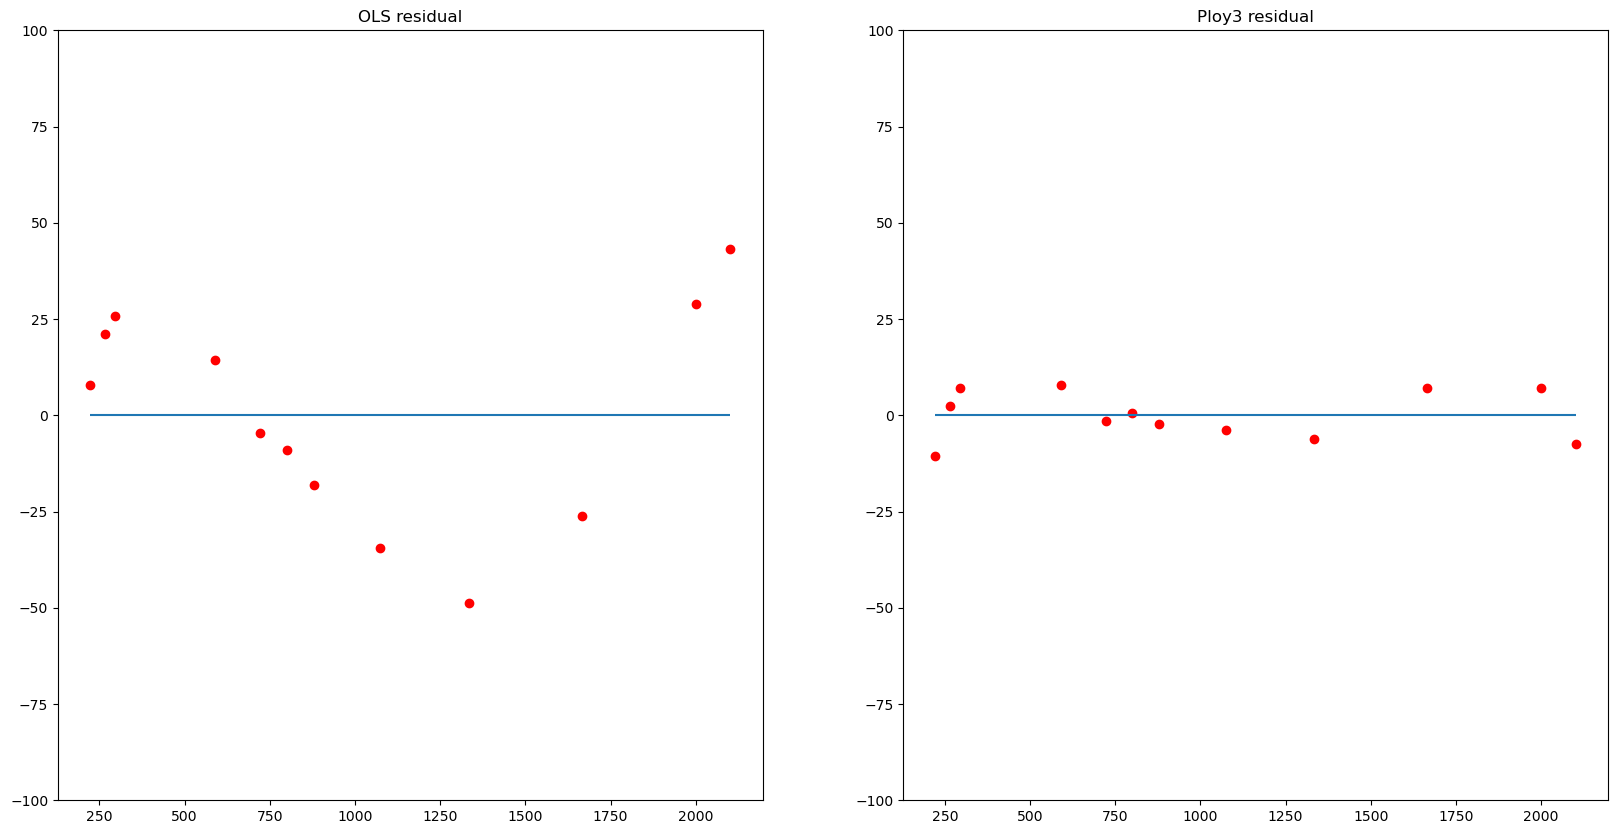

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
y_pred=Width_reg.predict(X_train)
plt.scatter(X_train,y_pred-y_train,c='red')
plt.hlines(0,np.min(X_train),np.max(X_train))
plt.ylim(-100,100)
plt.title('OLS residual')

plt.subplot(1,2,2)
m3_y_pred=model3.predict(X_train)
plt.scatter(X_train,m3_y_pred-y_train,c='red')
plt.hlines(0,np.min(X_train),np.max(X_train))
plt.ylim(-100,100)
plt.title('Ploy3 residual')

plt.show()

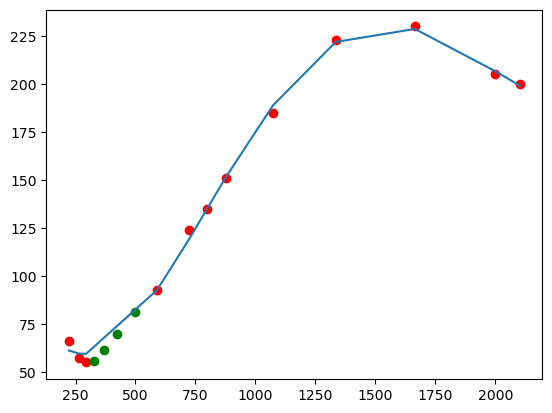

訓練誤差 0.9978999732091062
測試誤差 0.8777121785267292


In [19]:
model4 = make_pipeline(PolynomialFeatures(4),linear_model.LinearRegression())
model4.fit(X_train,y_train)
plt.scatter(X_train,y_train,c='red')
plt.scatter(X_test,y_test,c='green')
plt.plot(np.sort(X_train,axis=0),model4.predict(np.sort(X_train,axis=0)))
plt.show()
print("訓練誤差",model4.score(X_train,y_train))
print("測試誤差",model4.score(X_test,y_test))

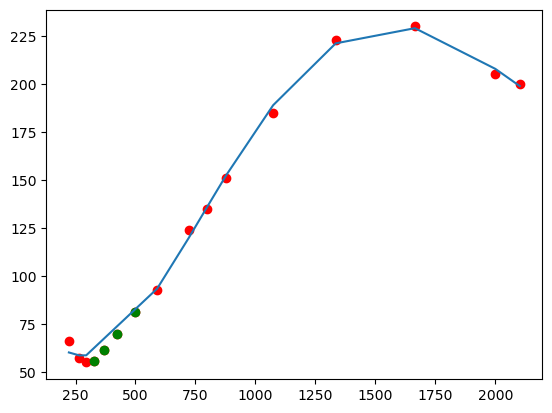

訓練誤差 0.9978353453484291
測試誤差 0.9001783592035906


In [20]:
model5 = make_pipeline(PolynomialFeatures(5),linear_model.LinearRegression())
model5.fit(X,y)
plt.scatter(X,y,c='red')
plt.scatter(X_test,y_test,c='green')
plt.plot(np.sort(X_train,axis=0),model5.predict(np.sort(X_train,axis=0)))
plt.show()
print("訓練誤差",model5.score(X_train,y_train))
print("測試誤差",model5.score(X_test,y_test))

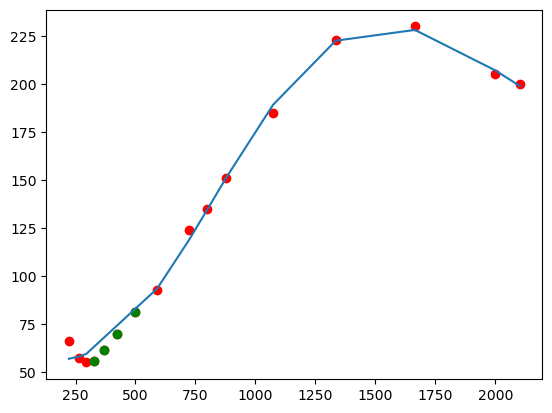

訓練誤差 0.9965196684113994
測試誤差 0.8725289686401251


In [21]:
model6 = make_pipeline(PolynomialFeatures(6),linear_model.LinearRegression())
model6.fit(X,y)
plt.scatter(X,y,c='red')
plt.scatter(X_test,y_test,c='green')
plt.plot(np.sort(X_train,axis=0),model6.predict(np.sort(X_train,axis=0)))
plt.show()
print("訓練誤差",model6.score(X_train,y_train))
print("測試誤差",model6.score(X_test,y_test))

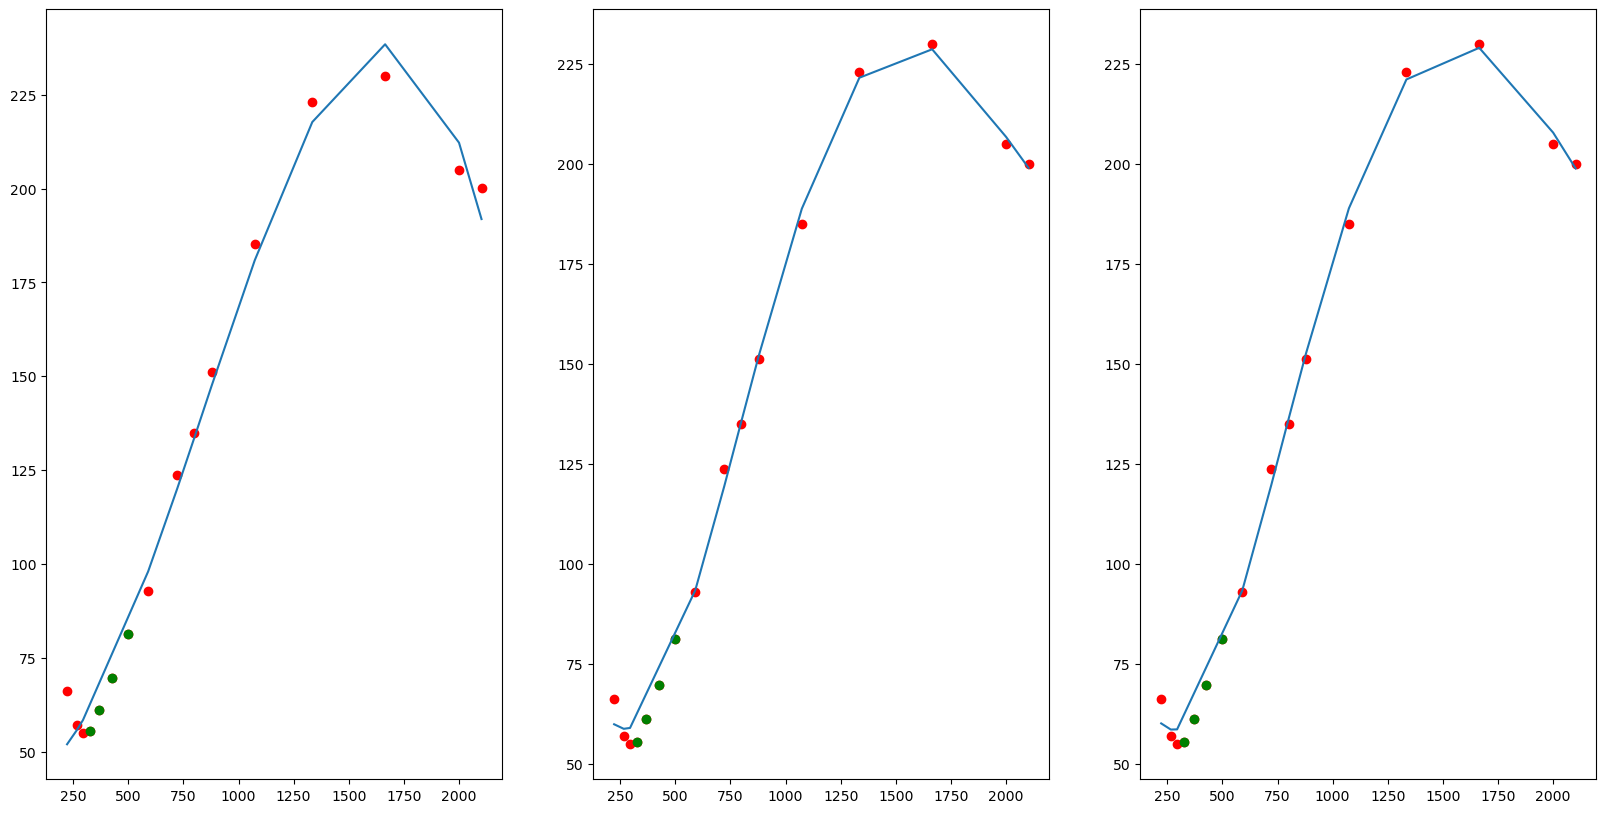

In [22]:
plt.figure(figsize=(20,10))
for i in range(1,4):
    plt.subplot(1,3,i)
    model = make_pipeline(PolynomialFeatures(i+2),linear_model.LinearRegression())
    model.fit(X,y)
    plt.scatter(X,y,c='red')
    plt.scatter(X_test,y_test,c='green')
    plt.plot(np.sort(X_train,axis=0),model.predict(np.sort(X_train,axis=0)))

plt.show()

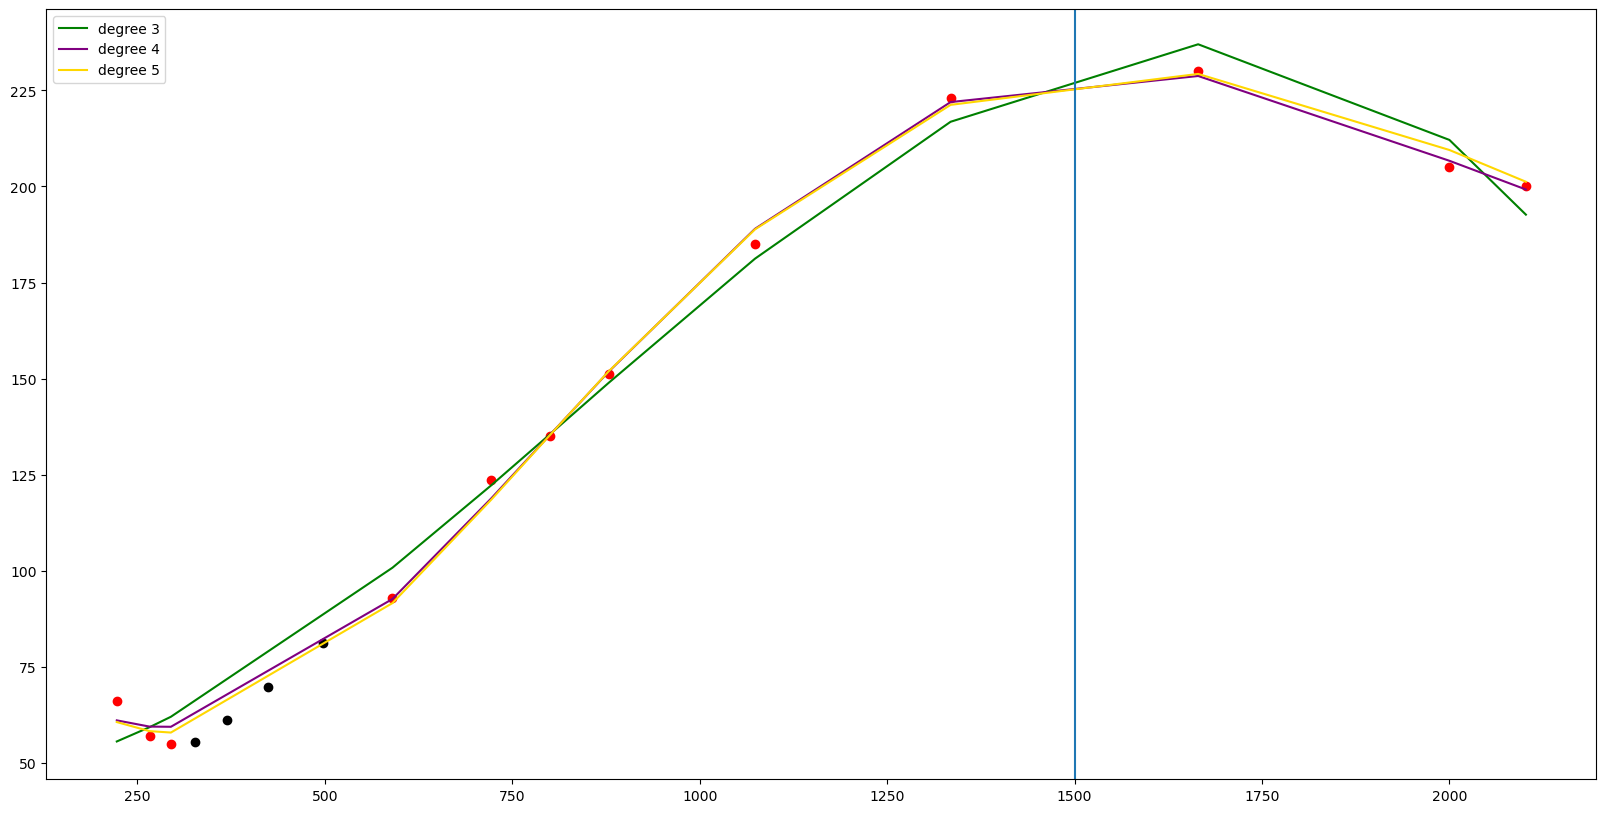

In [23]:
scores = []
colors = ['green','purple','gold']
predicts = []
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,c='red')
plt.scatter(X_test,y_test,c='black')
for count,degree in enumerate([3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X_train,y_train)
    scores.append(model.score(X_train,y_train))
    predicts.append(model.predict([[1500]]))
    plt.plot(np.sort(X_train,axis=0),model.predict(np.sort(X_train,axis=0)),color=colors[count],label="degree %d" % degree)

plt.axvline(1500)
plt.legend(loc=2)
plt.show()

In [24]:
print(scores)

[0.9904391254499285, 0.9978999732091062, 0.9976533354112558]


In [25]:
print(predicts)  #model.predict([[1500]])

[array([[231.33564074]]), array([[230.12644857]]), array([[229.64823873]])]


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)  #若設定test_size,則自動設定為0.3

In [27]:
model4 = make_pipeline(PolynomialFeatures(4),linear_model.LinearRegression())
model4.fit(X_train,y_train)

#模型的訓練誤差
model4.score(X_train,y_train)

0.99898863735116

In [28]:
#模型的測試誤差
model4.score(X_test,y_test)

0.964187938376131

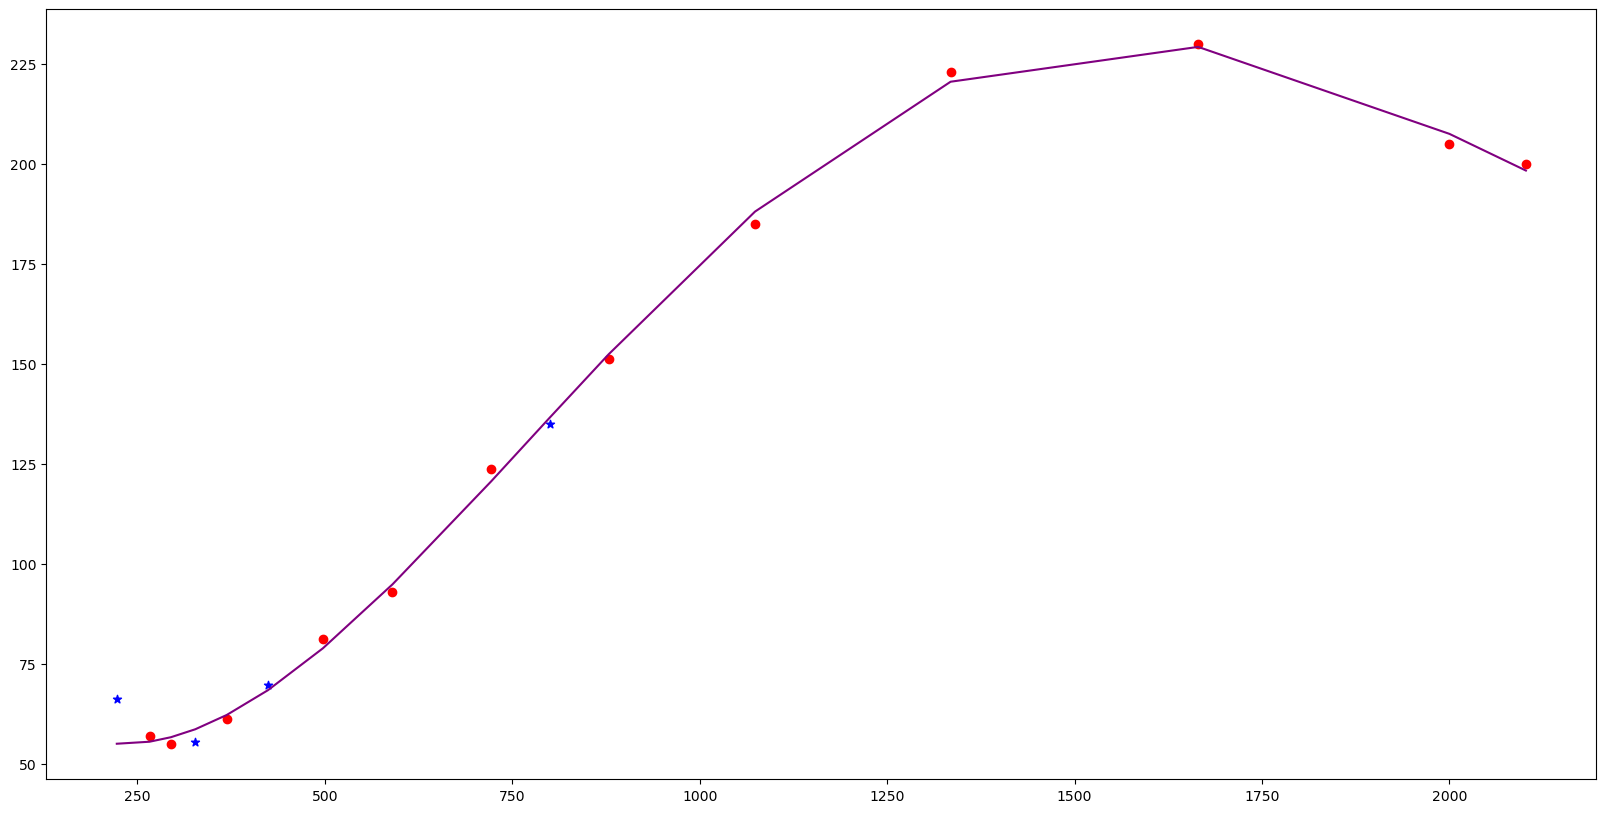

In [29]:
predicts = []
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,c='red')
plt.scatter(X_test,y_test,c='blue',marker='*')
plt.plot(X,model4.predict(X),color='purple',label="degree %d" % degree)

plt.show()

In [30]:
#泛化能力良好=訓練誤差>測試誤差,請注意前提:訓練誤差要先能夠達到一定標準